In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
superstore = pd.read_csv('Sample-Superstore.csv')

In [25]:
superstore.head()
df = superstore

In [5]:
missing_data = superstore.isnull()
missing_data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [12]:
# Resumen estadístico de las columnas numéricas
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
df.describe(include=['object'])

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [14]:
# Verificar si hay valores nulos en el DataFrame

valores_nulos = df.isnull().sum()

valores_nulos

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [23]:
# Verificar duplicados en el DataFrame
duplicados = df.duplicated().sum()
print("Cantidad de duplicados:", duplicados)

# Eliminar duplicados si los hay
df.drop_duplicates(inplace=True)

Cantidad de duplicados: 0


In [18]:
# Asegurémonos de que 'OrderDate' esté en formato de fecha
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [19]:
# Crear una nueva columna para el año
df['Year'] = df['Order Date'].dt.year

In [20]:
# Crear un DataFrame que contenga solo las columnas necesarias
sales_df = df[['Year', 'Sales', 'Profit']]

In [21]:
# Agrupar por año y calcular las ventas y ganancias totales
yearly_sales = sales_df.groupby('Year').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

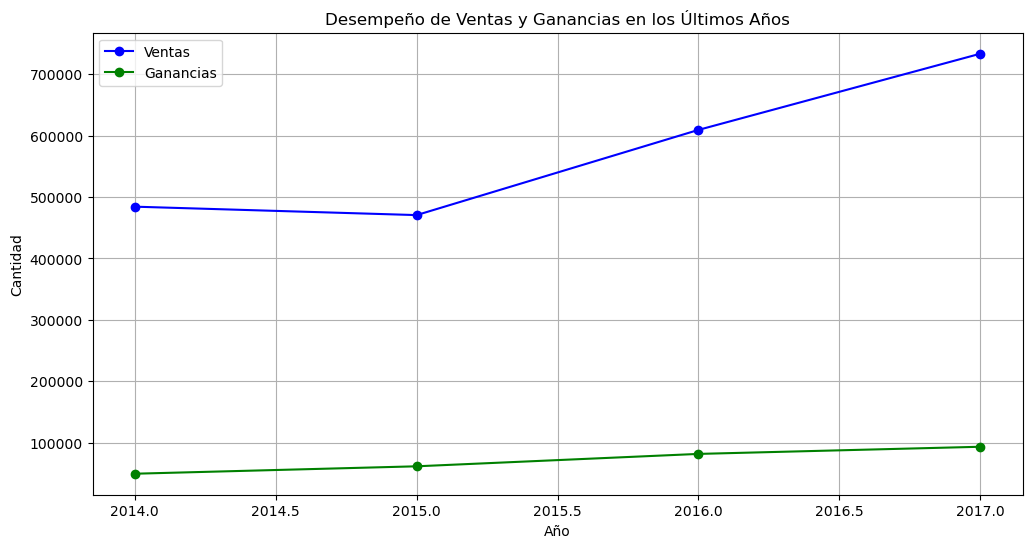

In [22]:
# Crear la visualización
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales['Year'], yearly_sales['Sales'], marker='o', label='Ventas', color='blue')
plt.plot(yearly_sales['Year'], yearly_sales['Profit'], marker='o', label='Ganancias', color='green')
plt.title('Desempeño de Ventas y Ganancias en los Últimos Años')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.show()

(0.0, 9149.9737)

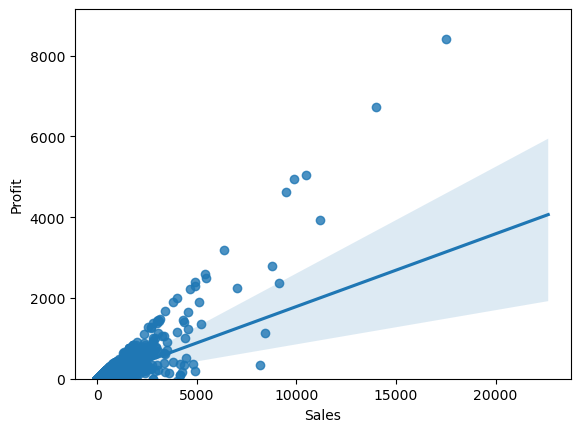

In [29]:
sns.regplot(x="Sales", y="Profit", data=df)
plt.ylim(0,)

In [30]:
df[["Sales", "Profit"]].corr()

,Sales,Profit
Sales,1.000000,0.479064
Profit,0.479064,1.000000


<Axes: xlabel='Category', ylabel='Sales'>

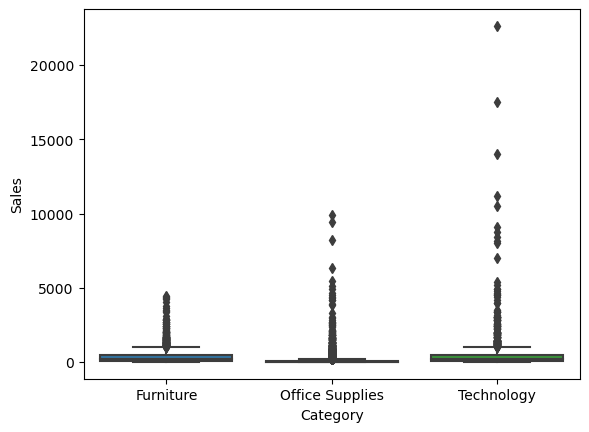

In [35]:
sns.boxplot(x="Category", y="Sales", data=df)

In [36]:
# Crear un DataFrame que contenga solo las columnas necesarias
sales_category_df = df[['Year', 'Category', 'Sales']]

# Agrupar por año y categoría, calcular las ventas totales
yearly_category_sales = sales_category_df.groupby(['Year', 'Category']).agg({'Sales': 'sum'}).reset_index()


In [37]:
sales_category_df.head()

,Year,Category,Sales
0,2016,Furniture,261.9600
1,2016,Furniture,731.9400
2,2016,Office Supplies,14.6200
3,2015,Furniture,957.5775
4,2015,Office Supplies,22.3680


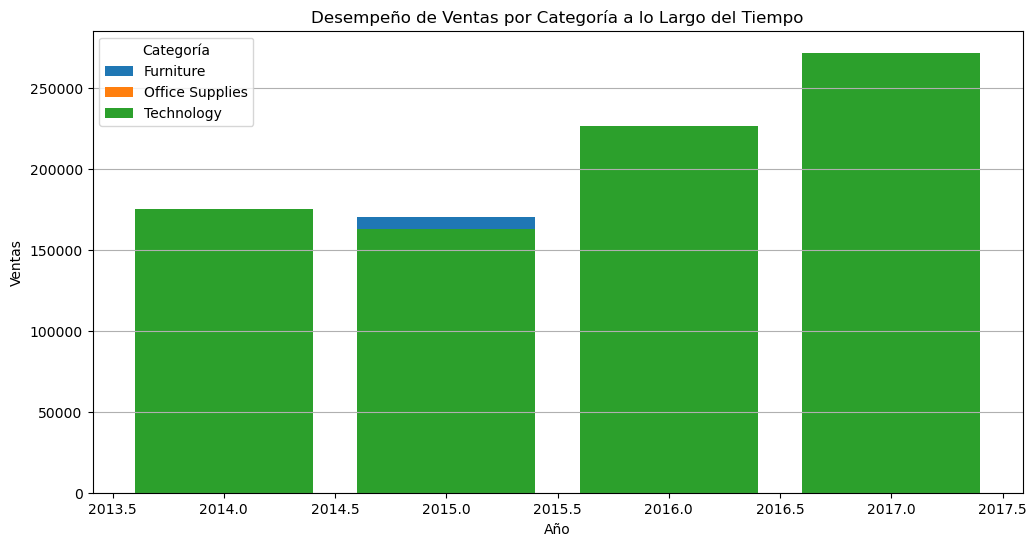

In [39]:
plt.figure(figsize=(12, 6))

# Crear un gráfico de barras para representar las ventas por categoría a lo largo del tiempo
for category in yearly_category_sales['Category'].unique():
    category_data = yearly_category_sales[yearly_category_sales['Category'] == category]
    plt.bar(category_data['Year'], category_data['Sales'], label=category)

plt.title('Desempeño de Ventas por Categoría a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.grid(axis='y')
plt.legend(title='Categoría')
plt.show()

<Axes: xlabel='Quantity', ylabel='Sales'>

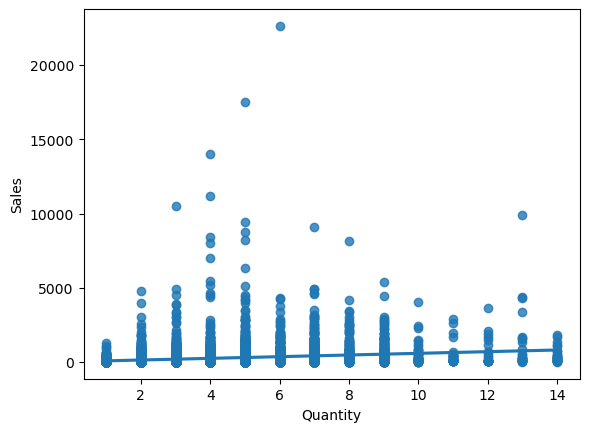

In [41]:
sns.regplot(x="Quantity", y="Sales", data=df)

<Axes: xlabel='Category', ylabel='Quantity'>

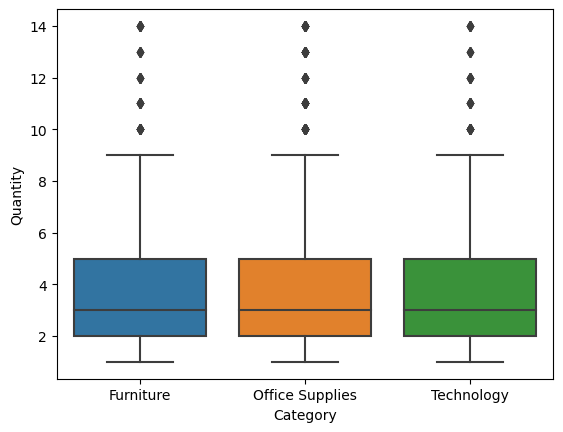

In [42]:
sns.boxplot(x="Category", y="Quantity", data=df)